## Data Sanity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

In [3]:
df=pd.read_csv("../data/Final.csv")
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [4]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [5]:
df.shape

(1101925, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [7]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [8]:
df.fillna("NaN",inplace=True)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,20220601,74357,NR02,946056501,"4415,19",20220601,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,20220601,84052,NR04,894775488,"0,00",20220601,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,20220601,85322,NR01,909729781,"0,00",20220601,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,20220601,90538,SR04,940836817,"0,00",20220601,SGD,NaN,1210331811


In [9]:
# Changing the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format="%Y%m%d")
df["ORDER_CREATION_DATE"]

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]

In [10]:
# Doing the same for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format="%Y%m%d")
df["REQUESTED_DELIVERY_DATE"]

0         2022-01-13
1         2022-01-11
2         2022-01-12
3         2022-01-06
4         2022-01-06
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: REQUESTED_DELIVERY_DATE, Length: 1101925, dtype: datetime64[ns]

In [11]:
# Checking how many records are having order date greater than the delivery date
Sanity_check= df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']]
print(Sanity_check.shape[0])

27142


### 10. Remove those records where order date is greater than the delivery date 

In [12]:
# Removing those records where order date is greater than the delivery date 
df=df.drop(Sanity_check.index, axis=0)

In [13]:
df.shape

(1074783, 16)

In [14]:
# Checking the number of records where the “ORDER_AMOUNT” field is having “-” in it.
df[df['ORDER_AMOUNT'].str.contains('-')].shape[0]

32

In [15]:
# Replacing “-” with “” from the “ORDER_AMOUNT” field. 
df["ORDER_AMOUNT"]=df["ORDER_AMOUNT"].str.replace("-","")
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",2022-06-01,SGD,NaN,1210331811


In [16]:
# Checking the number of records where the “ORDER_AMOUNT” field is having “,” in it.
df[df['ORDER_AMOUNT'].str.contains(',')].shape[0]

1073406

In [17]:
# Replacing “,” with “.” from the “ORDER_AMOUNT” field. 
df["ORDER_AMOUNT"]=df["ORDER_AMOUNT"].str.replace(",",".")
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811


In [18]:
# Counting the number of records where the order date and the delivery date are same
df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']].shape[0]

100437

In [19]:
# Counting the number of records for each currency type by using the field “'ORDER_CURRENCY'”
df['ORDER_CURRENCY'].value_counts()

ORDER_CURRENCY
USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: count, dtype: int64

In [20]:
# Creating a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 
r={'EUR':1.0750683 ,'AUD':0.65434919 ,'CAD':0.73559549 ,'GBP':1.2366234 ,'MYR':0.21779048 ,'PLN':0.23858119 ,'AED':0.27229408 ,'HKD':0.12772012 ,'CHF':1.1048032 ,'RON':0.21659595 ,'SGD':0.74098927 ,'CZK':0.045407048 ,'HU1':0.0028868027 ,'NZD':0.61116474 ,'BHD':2.6595745 ,'SAR':0.26666667 ,'QAR':0.27472527 ,'KWD':3.2518155 ,'SEK':0.093262719 }
df["ORDER_AMOUNT"] = pd.to_numeric(df["ORDER_AMOUNT"], errors="coerce")
df["amount_in_usd"] = df.apply(lambda x: x["ORDER_AMOUNT"] / r[x["ORDER_CURRENCY"]] if x["ORDER_CURRENCY"] != "USD" else x["ORDER_AMOUNT"], axis=1)

In [21]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.952886
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,732.381375
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62780.625194
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1307.396005
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,5958.507334
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.000000
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.000000
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.000000


In [22]:
# Check for values “0” in the “'amount_in_usd” column. 
df[df['amount_in_usd'] == 0].shape[0]

237821

In [23]:
# Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['unique_cust_id'] = (df['COMPANY_CODE']).astype(str)+(df['CUSTOMER_NUMBER']).astype(str)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.952886,322012311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,732.381375,322012311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62780.625194,326012118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1307.396005,32901210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,32901210351400


###   

## EDA

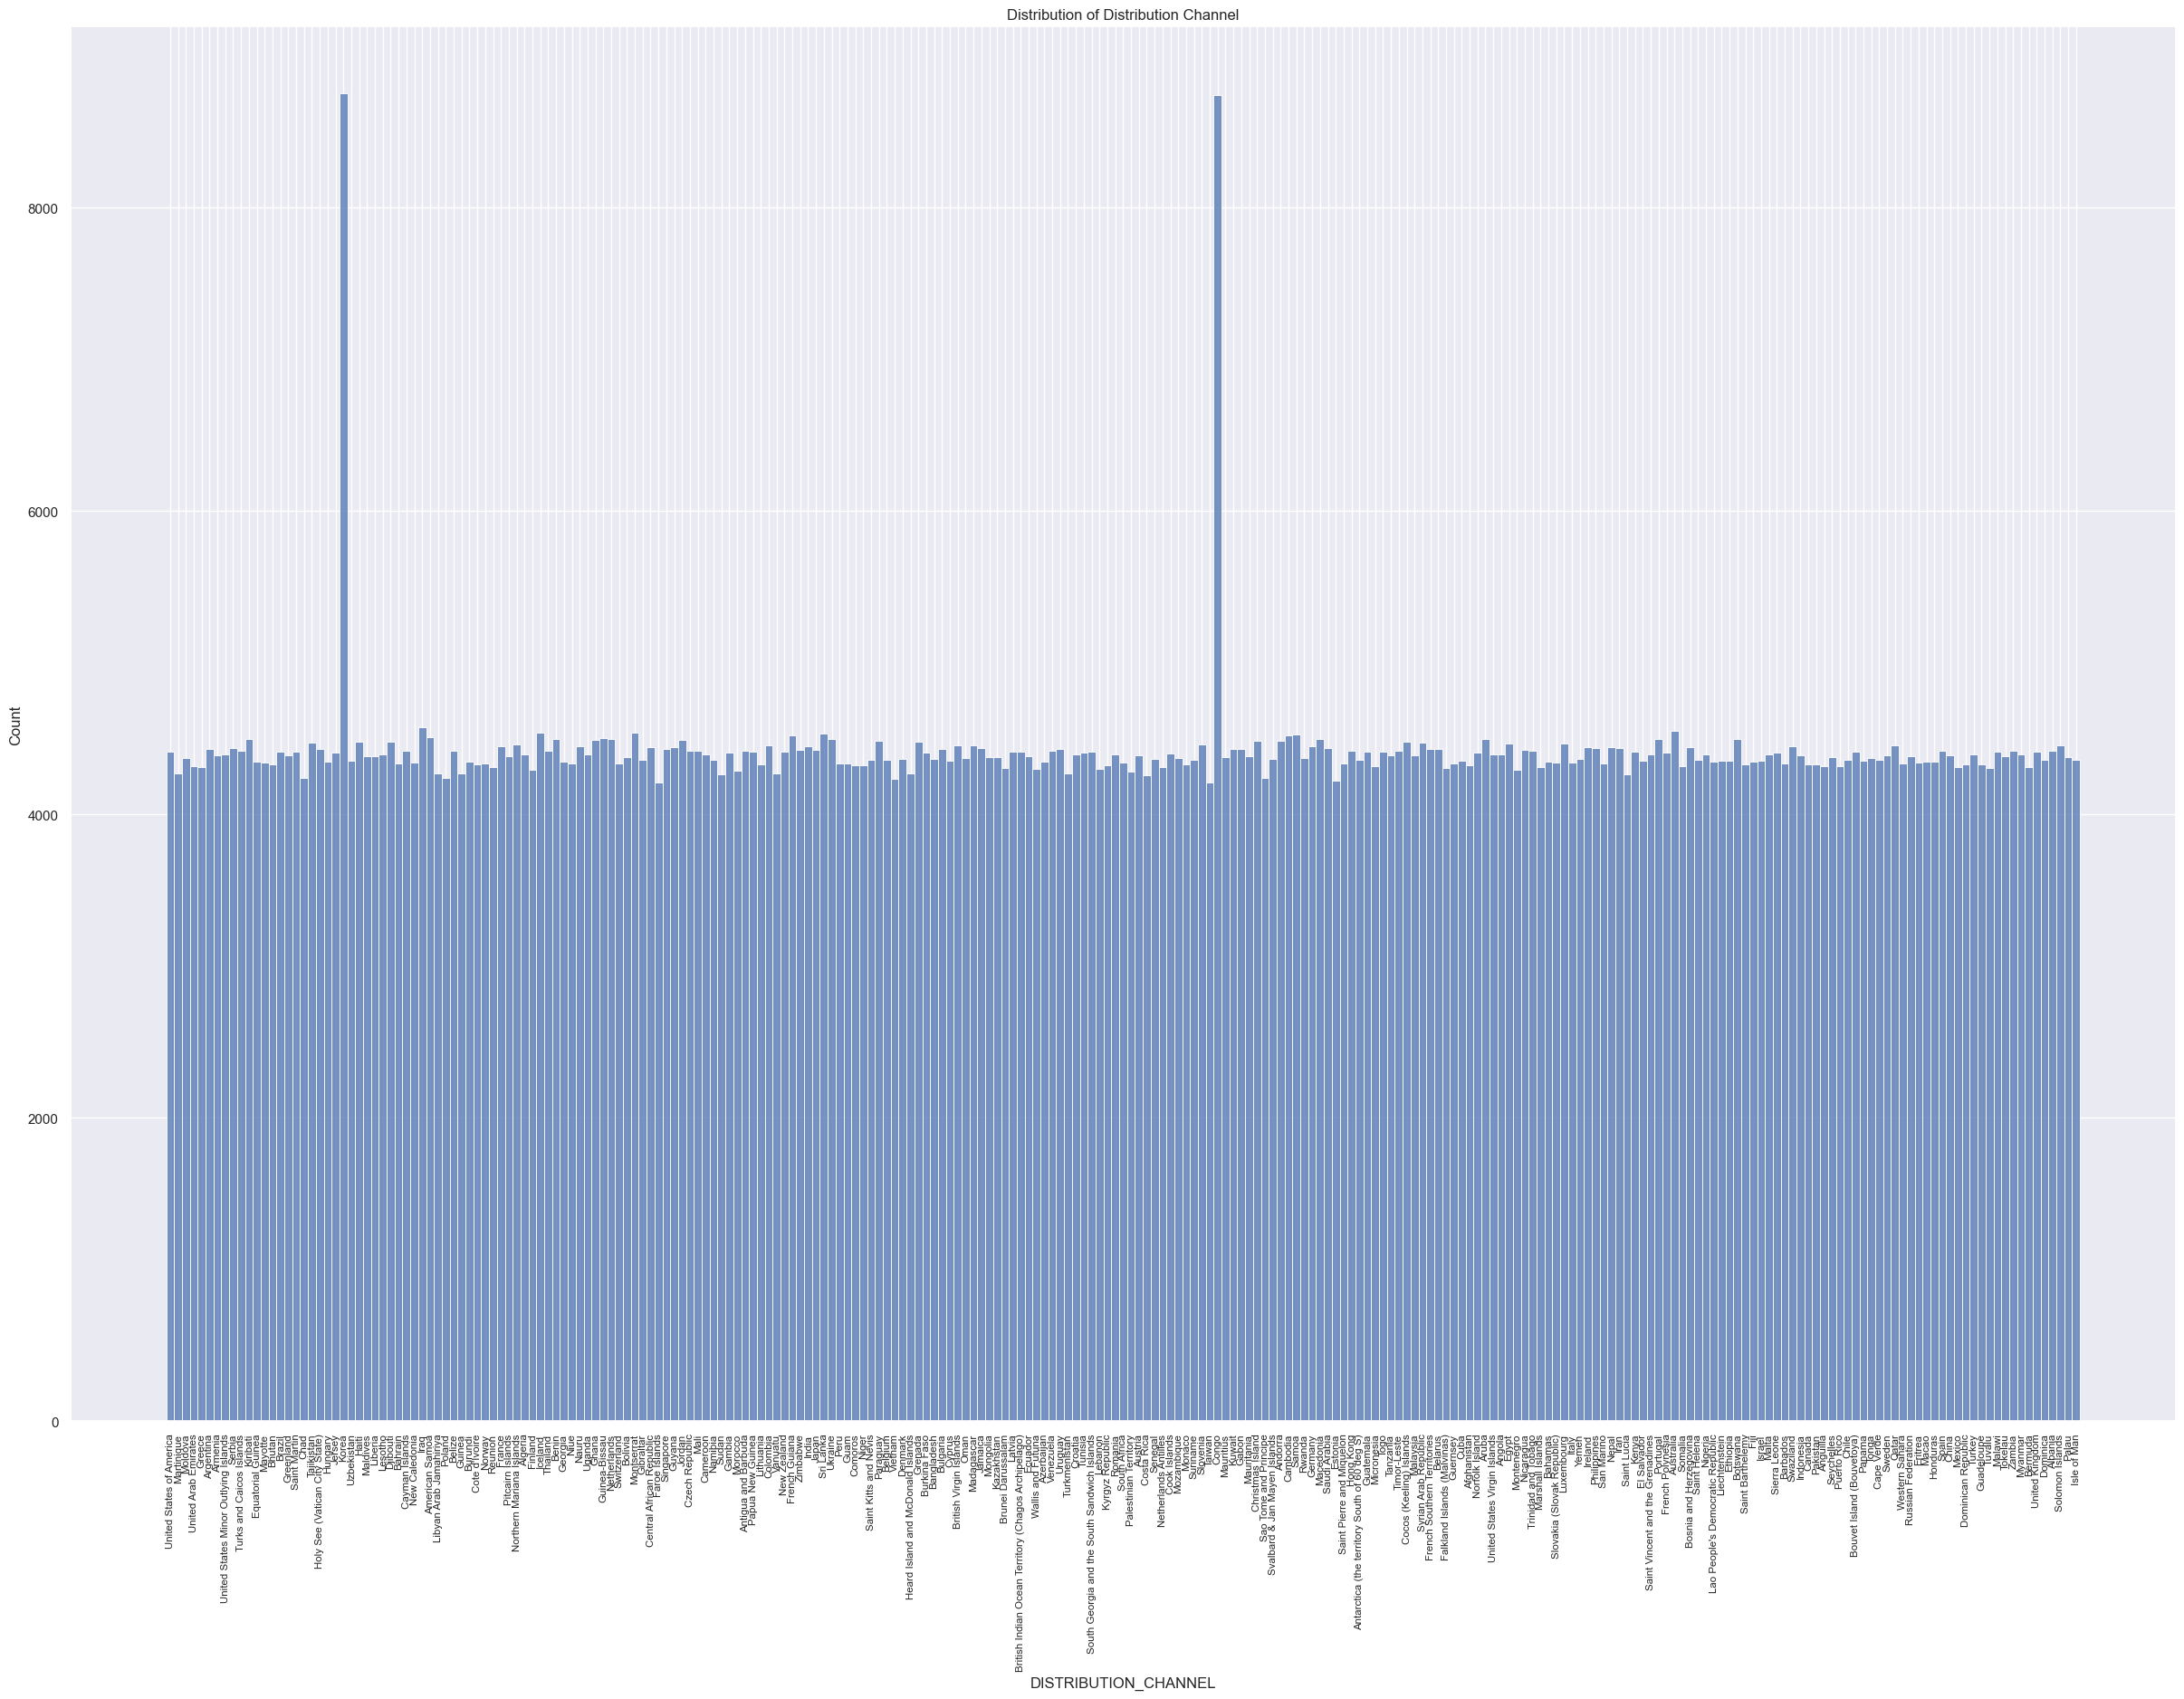

In [24]:
# Histogram on DISTRIBUTION_CHANNEL
plt.figure(figsize=(30, 20))
sns.set(style="darkgrid")
sns.histplot(data=df,x="DISTRIBUTION_CHANNEL")
plt.xticks(rotation=90,fontsize='x-small')
plt.title("Distribution of Distribution Channel")
plt.show()

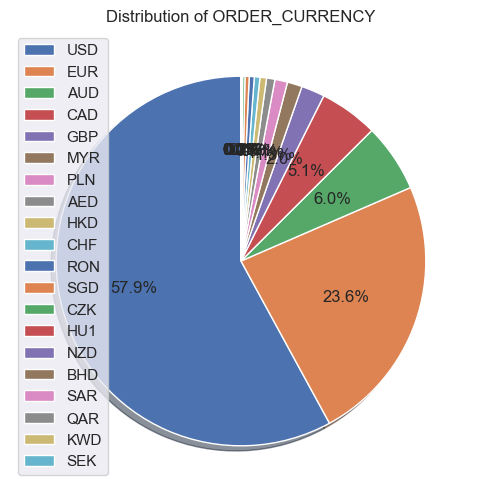

In [25]:
# Pie Chart on ORDER_CURRENCY
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
count=df["ORDER_CURRENCY"].value_counts()
plt.pie(count, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Distribution of ORDER_CURRENCY")
plt.legend(count.index)
plt.show()

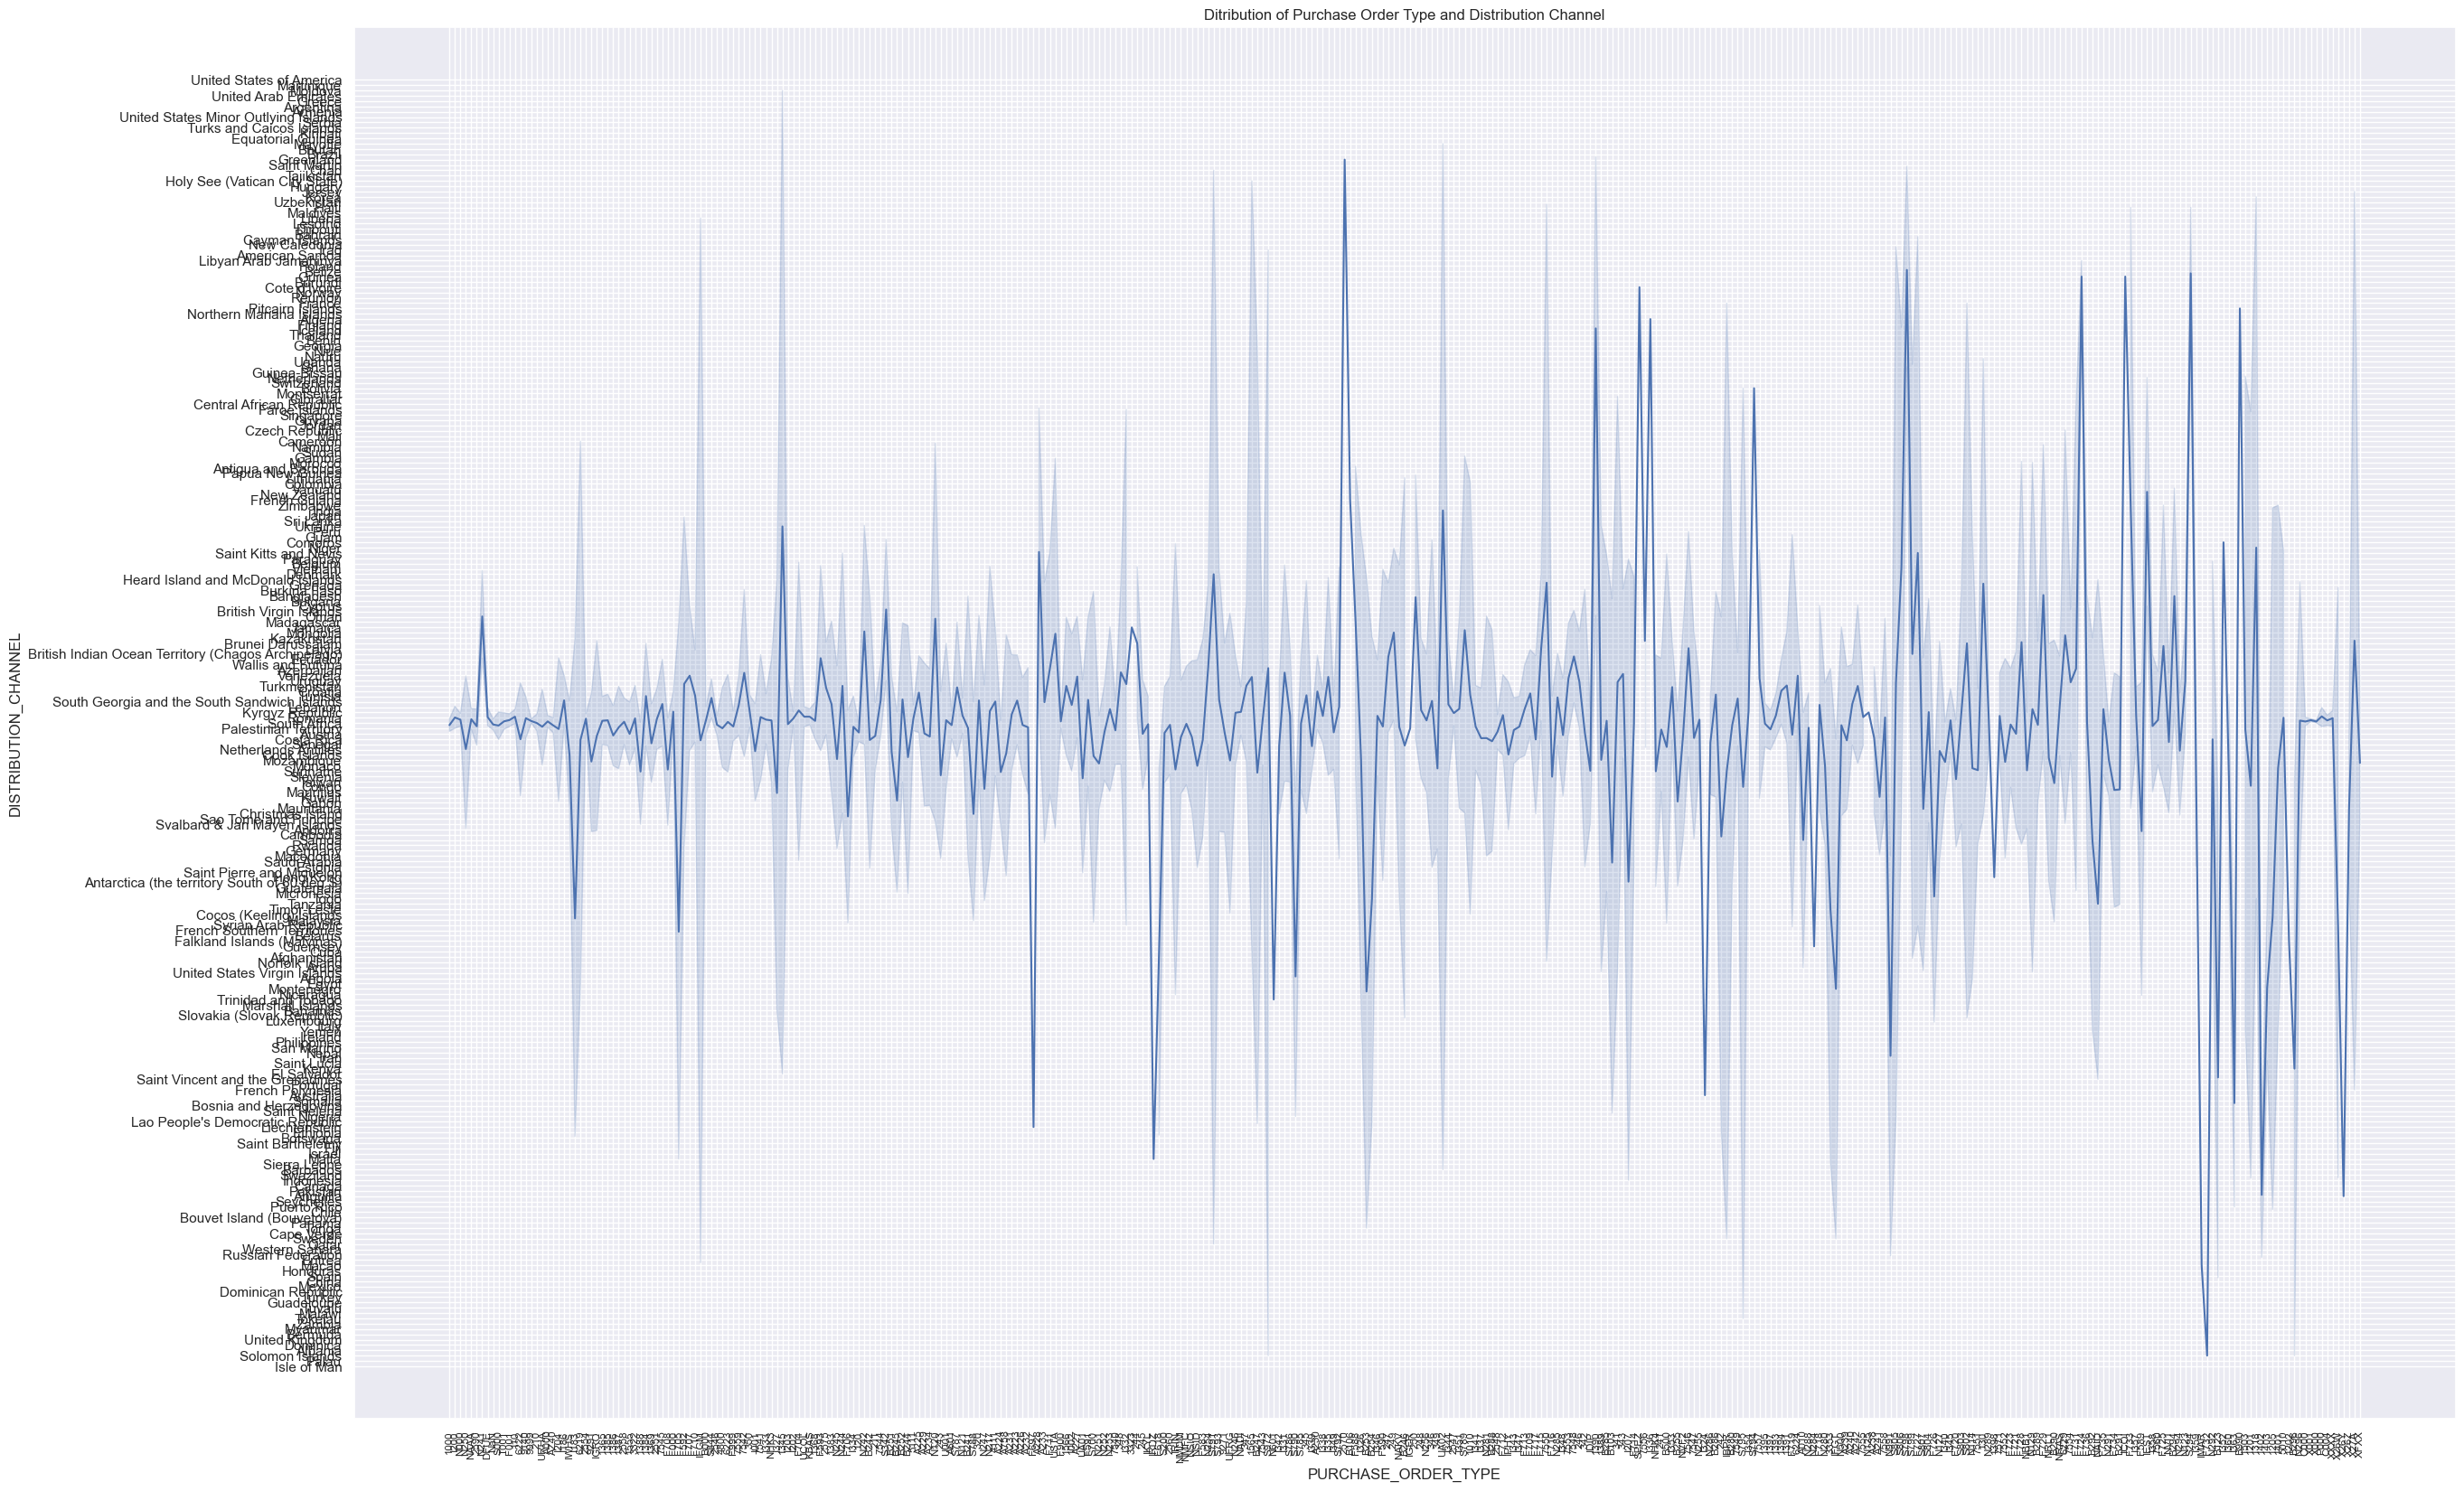

In [26]:
# Line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

sns.set(style="darkgrid")
plt.figure(figsize=(30, 20))
sns.lineplot(data=df,x="PURCHASE_ORDER_TYPE",y="DISTRIBUTION_CHANNEL")
plt.xticks(rotation=90,fontsize='x-small')
plt.title("Ditribution of Purchase Order Type and Distribution Channel")
plt.show()

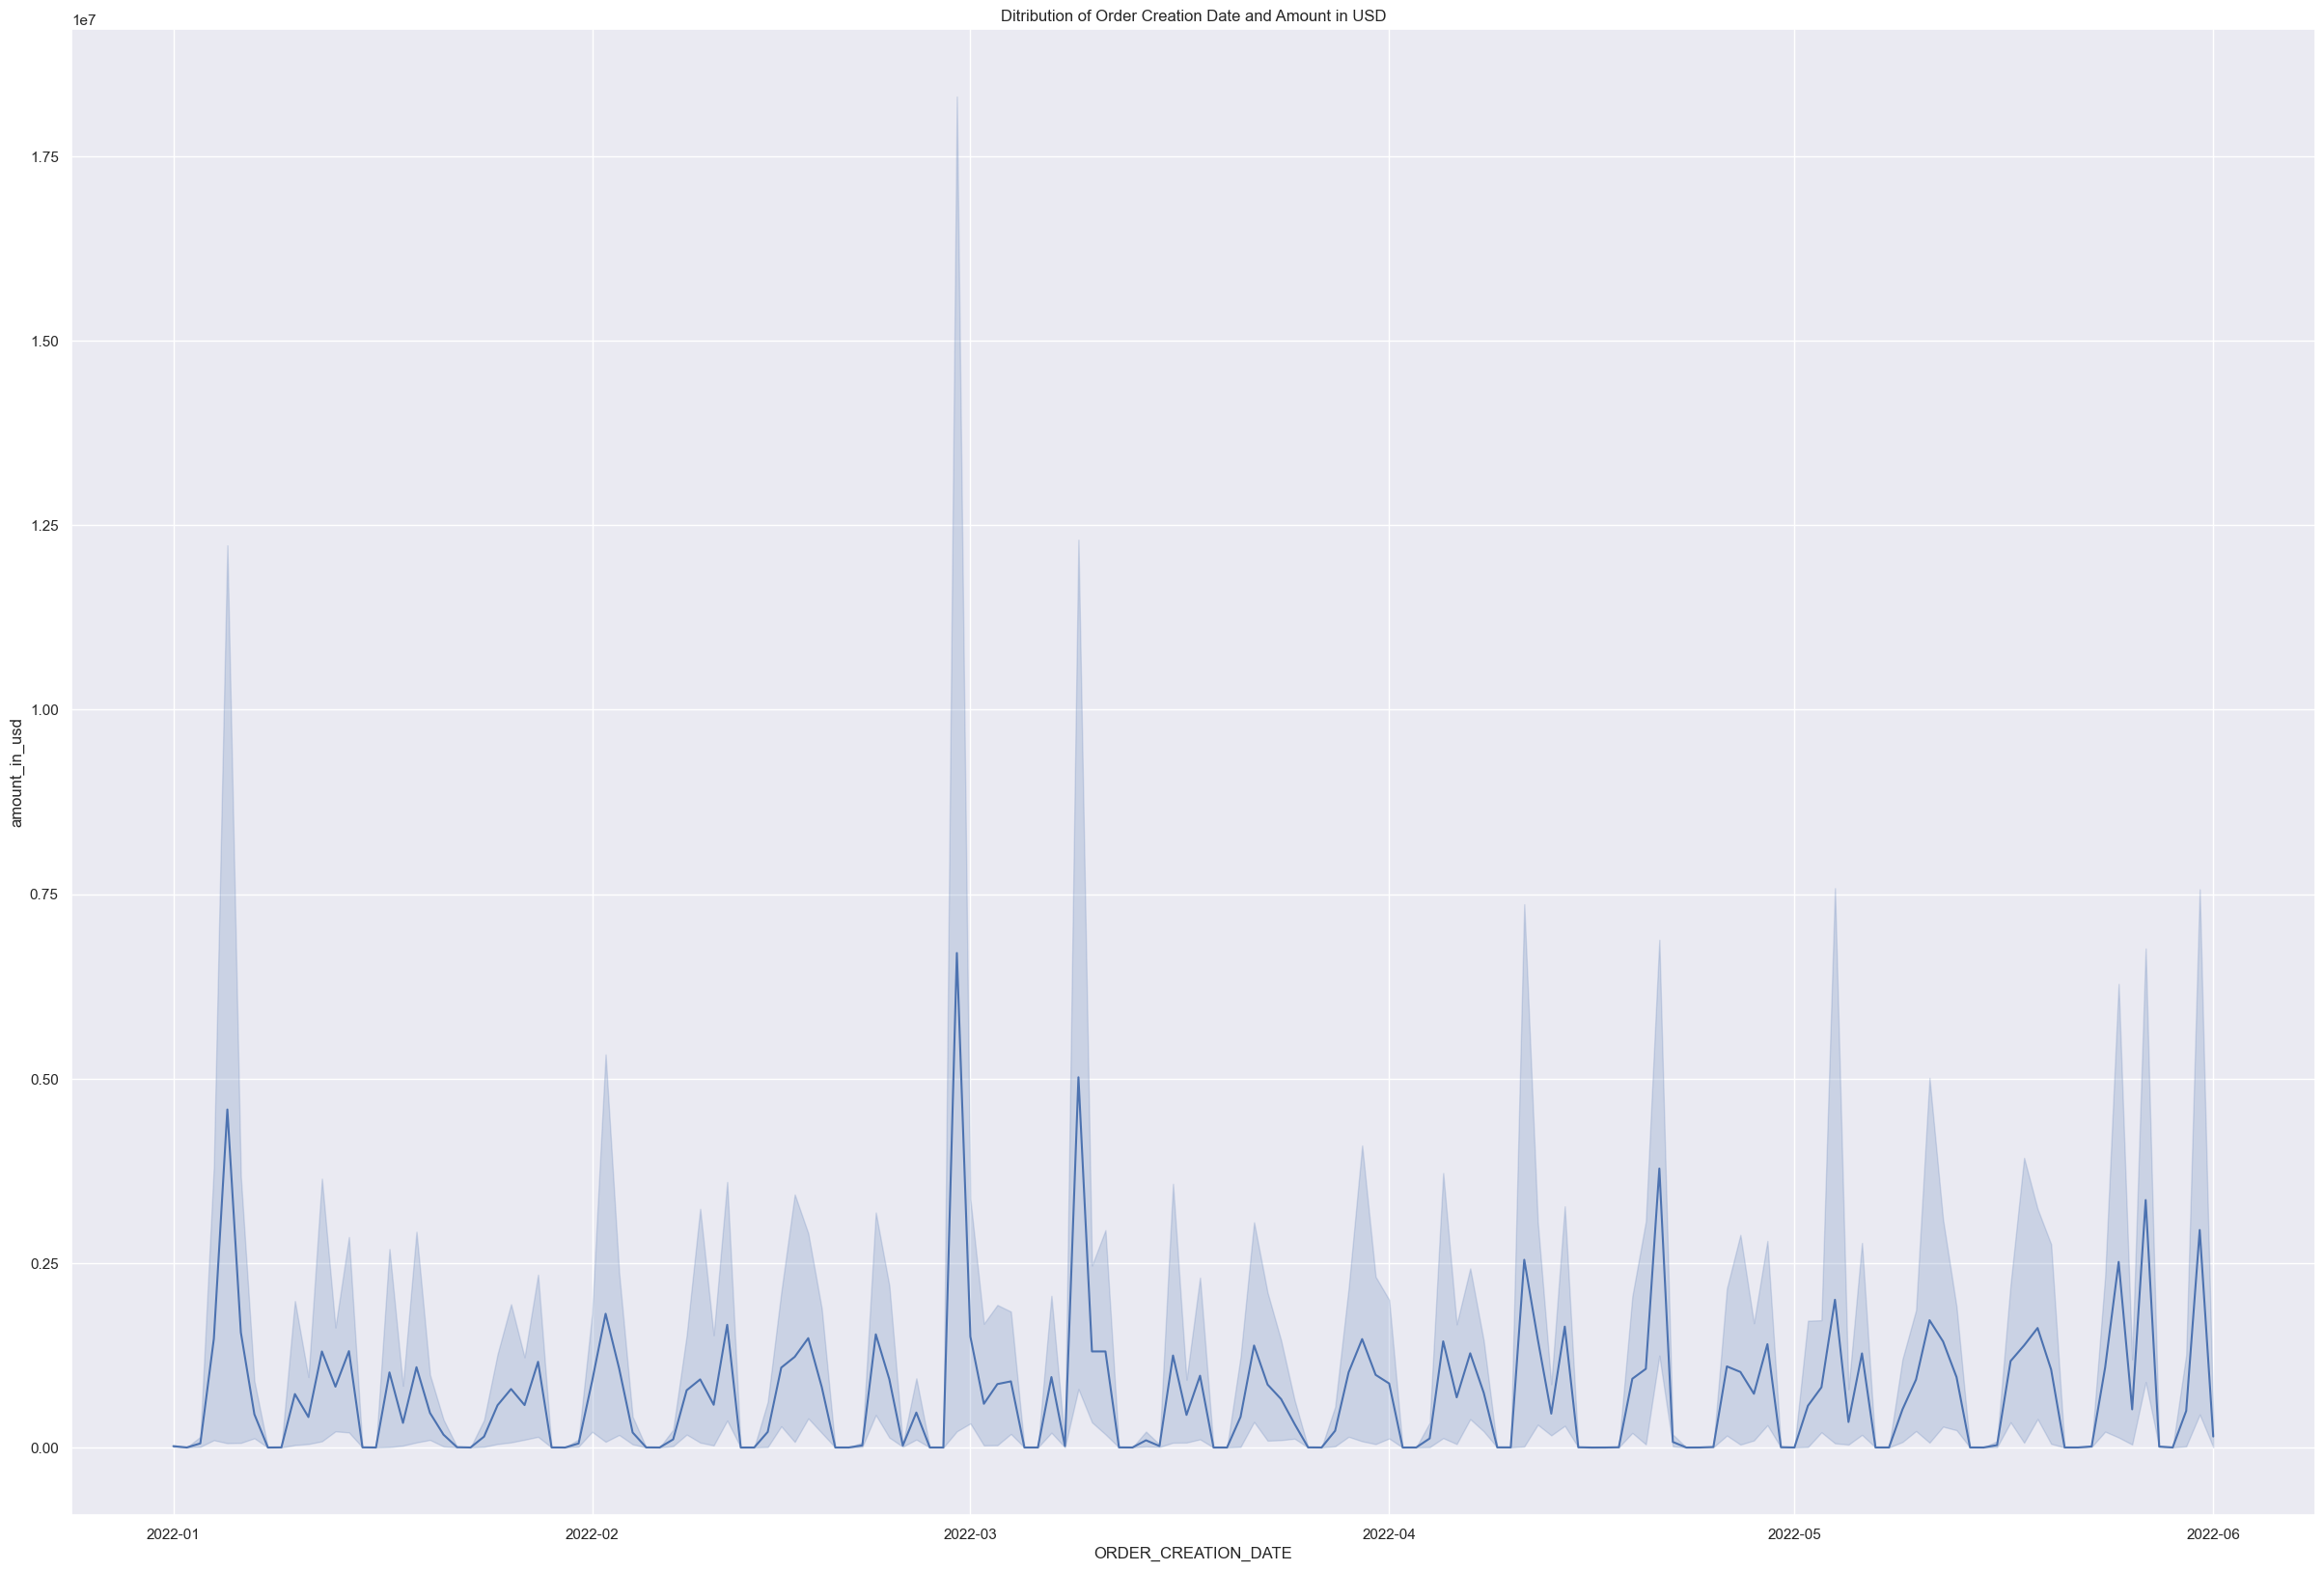

In [27]:
# Line plot on ORDER_CREATION_DATE and amount_in_usd
sns.set(style="darkgrid")
plt.figure(figsize=(30, 20))
sns.lineplot(data=df,x="ORDER_CREATION_DATE",y="amount_in_usd")
plt.title("Ditribution of Order Creation Date and Amount in USD")
plt.show()

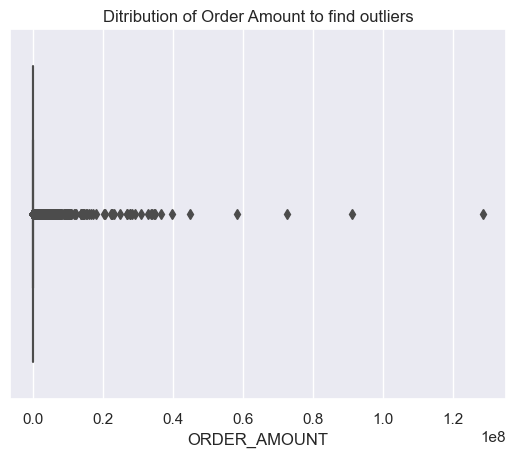

In [28]:
# Boxplot on ORDER_AMOUNT to find out the outliers
sns.set(style="darkgrid")
sns.boxplot(data=df,x="ORDER_AMOUNT")
plt.title("Ditribution of Order Amount to find outliers")
plt.show()

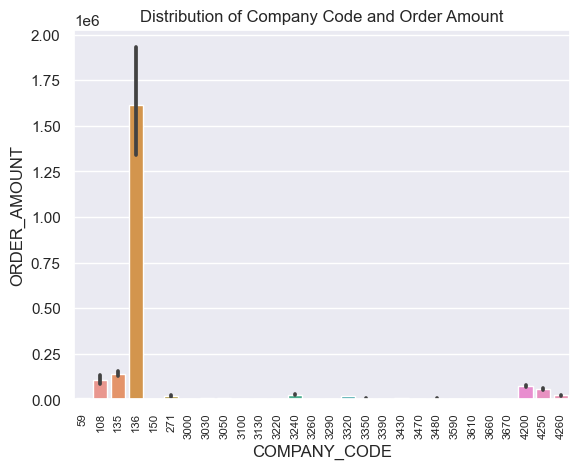

In [29]:
# Barchart on COMPANY_CODE and ORDER_AMOUNT
sns.set(style="darkgrid")
sns.barplot(data=df,x="COMPANY_CODE",y="ORDER_AMOUNT")
plt.xticks(rotation=90,fontsize='x-small')
plt.title("Distribution of Company Code and Order Amount")
plt.show()

###  

## Feature Engineering and Selection

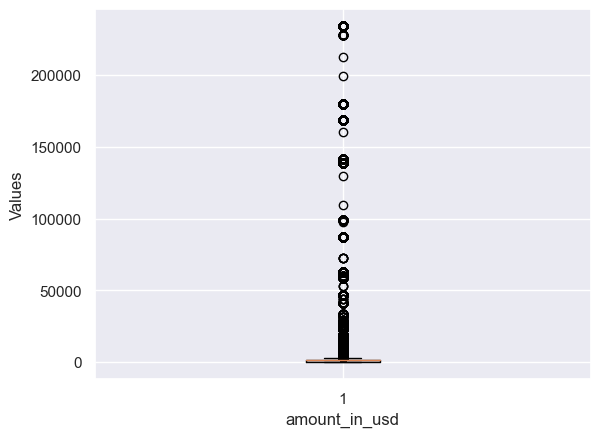

In [30]:
# Replacing the outliers with appropriate values

grouped_df = df.groupby('PURCHASE_ORDER_TYPE')
grouped_mean = grouped_df['amount_in_usd'].mean()
grouped_iqr = grouped_df['amount_in_usd'].quantile(0.75) - grouped_df['amount_in_usd'].quantile(0.25)

lower_bound = grouped_df['amount_in_usd'].quantile(0.25) - 1.5 * grouped_iqr
upper_bound = grouped_df['amount_in_usd'].quantile(0.75) + 1.5 * grouped_iqr

for group_name, group_data in grouped_df:
    mask = (group_data['amount_in_usd'] < lower_bound[group_name]) | (group_data['amount_in_usd'] > upper_bound[group_name])
    group_data.loc[mask, 'amount_in_usd'] = group_data['amount_in_usd'].median()

df['amount_in_usd'] = grouped_df['amount_in_usd'].transform('first')

sns.set(style="darkgrid")
plt.boxplot(df['amount_in_usd'])
plt.xlabel('amount_in_usd')
plt.ylabel('Values')
plt.show()


In [31]:
category=[]
other=[]
for i in df.columns:
    if (df[i].dtype=='object' or df[i].dtype=='category'):
        category.append(i)
    elif (df[i].dtype=='float64' or df[i].dtype=='int64'):
        other.append(i)

print(category,"\n",other)

['DISTRIBUTION_CHANNEL', 'DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'CREDIT_STATUS', 'unique_cust_id'] 
 ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'COMPANY_CODE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'CUSTOMER_NUMBER', 'amount_in_usd']


In [32]:
# Label Encoding/One Hot Encoding on categorical data
le=LabelEncoder()
for i in category:
    df[i]=df[i].astype(str)
    df[i]=le.fit_transform(df[i])

# ohe=OneHotEncoder()
# for i in category:
#    df[i]=df[i].astype(str)
#    df[i]=ohe.fit_transform(df[i])

In [33]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,954.61,2022-01-13,6,3,12311807,887.952886,3688
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,787.36,2022-01-11,6,3,12311807,887.952886,3688
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,67493.46,2022-01-12,6,2,12118758,62780.625194,4034
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,1405.54,2022-01-06,6,2,1210499770,1307.396005,4532
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,0.00,2022-01-06,6,1,1210351400,1307.396005,4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,79,1,1,306,4260,2022-06-01,74357,1,946056501,4415.19,2022-06-01,18,3,1210331804,168954.205688,6477
1101921,998890898,4509,10,1,1,306,4260,2022-06-01,84052,3,894775488,0.00,2022-06-01,18,3,1210331804,168954.205688,6477
1101922,983330221,3951,151,1,1,306,4260,2022-06-01,85322,0,909729781,0.00,2022-06-01,18,3,1210331811,168954.205688,6479
1101923,926668029,3235,167,1,1,306,4260,2022-06-01,90538,7,940836817,0.00,2022-06-01,18,3,1210331811,168954.205688,6479


In [34]:
# Log Transformations on continuous columns 

cols = ['amount_in_usd', 'RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT']

for col in cols:
    if df[col].dtype in [int, float]:
        df[col] = df[col].apply(lambda x: np.log(x) if x > 0 else x)

df[cols]

,amount_in_usd,RELEASED_CREDIT_VALUE,ORDER_AMOUNT
0,6.788919,0.000000,6.861303
1,6.788919,0.000000,6.668686
2,11.047402,10.680424,11.119786
3,7.175793,8.968524,7.248177
4,7.175793,0.000000,0.000000
...,...,...,...
1101920,12.037383,0.000000,8.392806
1101921,12.037383,0.000000,0.000000
1101922,12.037383,0.000000,0.000000
1101923,12.037383,0.000000,0.000000


In [35]:
# Extracting new features
grp = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grp.columns = ['SALES_ORG', 'AVG_ORDER_AMOUNT', 'TOTAL_CREDIT_VALUE', 'UNIQUE_CUSTOMER', 'MAX_AMOUNT_IN_USD']

grp

,SALES_ORG,AVG_ORDER_AMOUNT,TOTAL_CREDIT_VALUE,UNIQUE_CUSTOMER,MAX_AMOUNT_IN_USD
0,2100,4.483412,336.782176,141,12.037383
1,2101,4.759214,330.482688,129,12.037383
2,2102,4.754755,282.677968,116,12.037383
3,2103,4.686690,279.911595,124,12.037383
4,2104,4.558563,327.817866,137,12.101155
...,...,...,...,...,...
2406,4506,4.881762,288.587931,143,12.101155
2407,4507,4.775988,286.548104,122,12.363671
2408,4508,4.784461,321.872938,139,12.037383
2409,4509,4.749182,259.260909,146,12.037383


In [36]:
df = df.merge(grp, on='SALES_ORG', how='left')
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,AVG_ORDER_AMOUNT,TOTAL_CREDIT_VALUE,UNIQUE_CUSTOMER,MAX_AMOUNT_IN_USD
0,946851639,3537,232,1,0.000000,0,3220,2022-01-01,43012,5,...,2022-01-13,6,3,12311807,6.788919,3688,4.729016,329.108055,139,12.101155
1,963432061,3449,135,1,0.000000,0,3220,2022-01-01,43114,2,...,2022-01-11,6,3,12311807,6.788919,3688,4.993062,239.225401,122,12.037383
2,971991639,3238,141,1,10.680424,204,3260,2022-01-01,110019,0,...,2022-01-12,6,2,12118758,11.047402,4034,4.899358,360.436242,143,12.101155
3,754349803,3911,228,1,8.968524,255,3290,2022-01-01,153013,5,...,2022-01-06,6,2,1210499770,7.175793,4532,4.619698,236.698890,126,12.037383
4,930253442,2381,82,1,0.000000,255,3290,2022-01-01,160020,4,...,2022-01-06,6,1,1210351400,7.175793,4468,4.603923,387.756217,152,12.037383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,79,1,0.000000,306,4260,2022-06-01,74357,1,...,2022-06-01,18,3,1210331804,12.037383,6477,4.722698,200.421376,129,12.037383
1074779,998890898,4509,10,1,0.000000,306,4260,2022-06-01,84052,3,...,2022-06-01,18,3,1210331804,12.037383,6477,4.749182,259.260909,146,12.037383
1074780,983330221,3951,151,1,0.000000,306,4260,2022-06-01,85322,0,...,2022-06-01,18,3,1210331811,12.037383,6479,4.779729,254.961744,142,12.037383
1074781,926668029,3235,167,1,0.000000,306,4260,2022-06-01,90538,7,...,2022-06-01,18,3,1210331811,12.037383,6479,4.746568,225.428454,115,12.101155


In [37]:
# Calculating the lagged sales amounts and the differences in sales amounts over a specified number of days for each customer
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop = True)
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt

In [38]:
df = difference_in_days(df, lags=7, ffday=1, customer_id_col='CUSTOMER_NUMBER', create_date_col='CREATE_DATE', net_amount_col='amount_in_usd')

In [39]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff
0,946851639,3537,232,1,0.000000,0,3220,2022-01-01,43012,5,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,963432061,3449,135,1,0.000000,0,3220,2022-01-01,43114,2,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,971991639,3238,141,1,10.680424,204,3260,2022-01-01,110019,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,754349803,3911,228,1,8.968524,255,3290,2022-01-01,153013,5,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,930253442,2381,82,1,0.000000,255,3290,2022-01-01,160020,4,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,79,1,0.000000,306,4260,2022-06-01,74357,1,...,12.037383,7.970627,7.970627,0.000000,0.0,4.066756,-4.066756,4.066756,0.000000,0.000000
1074779,998890898,4509,10,1,0.000000,306,4260,2022-06-01,84052,3,...,7.970627,12.037383,7.970627,0.000000,0.0,0.000000,4.066756,-4.066756,4.066756,0.000000
1074780,983330221,3951,151,1,0.000000,306,4260,2022-06-01,85322,0,...,7.970627,7.970627,7.970627,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1074781,926668029,3235,167,1,0.000000,306,4260,2022-06-01,90538,7,...,7.970627,7.970627,7.970627,4.066756,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


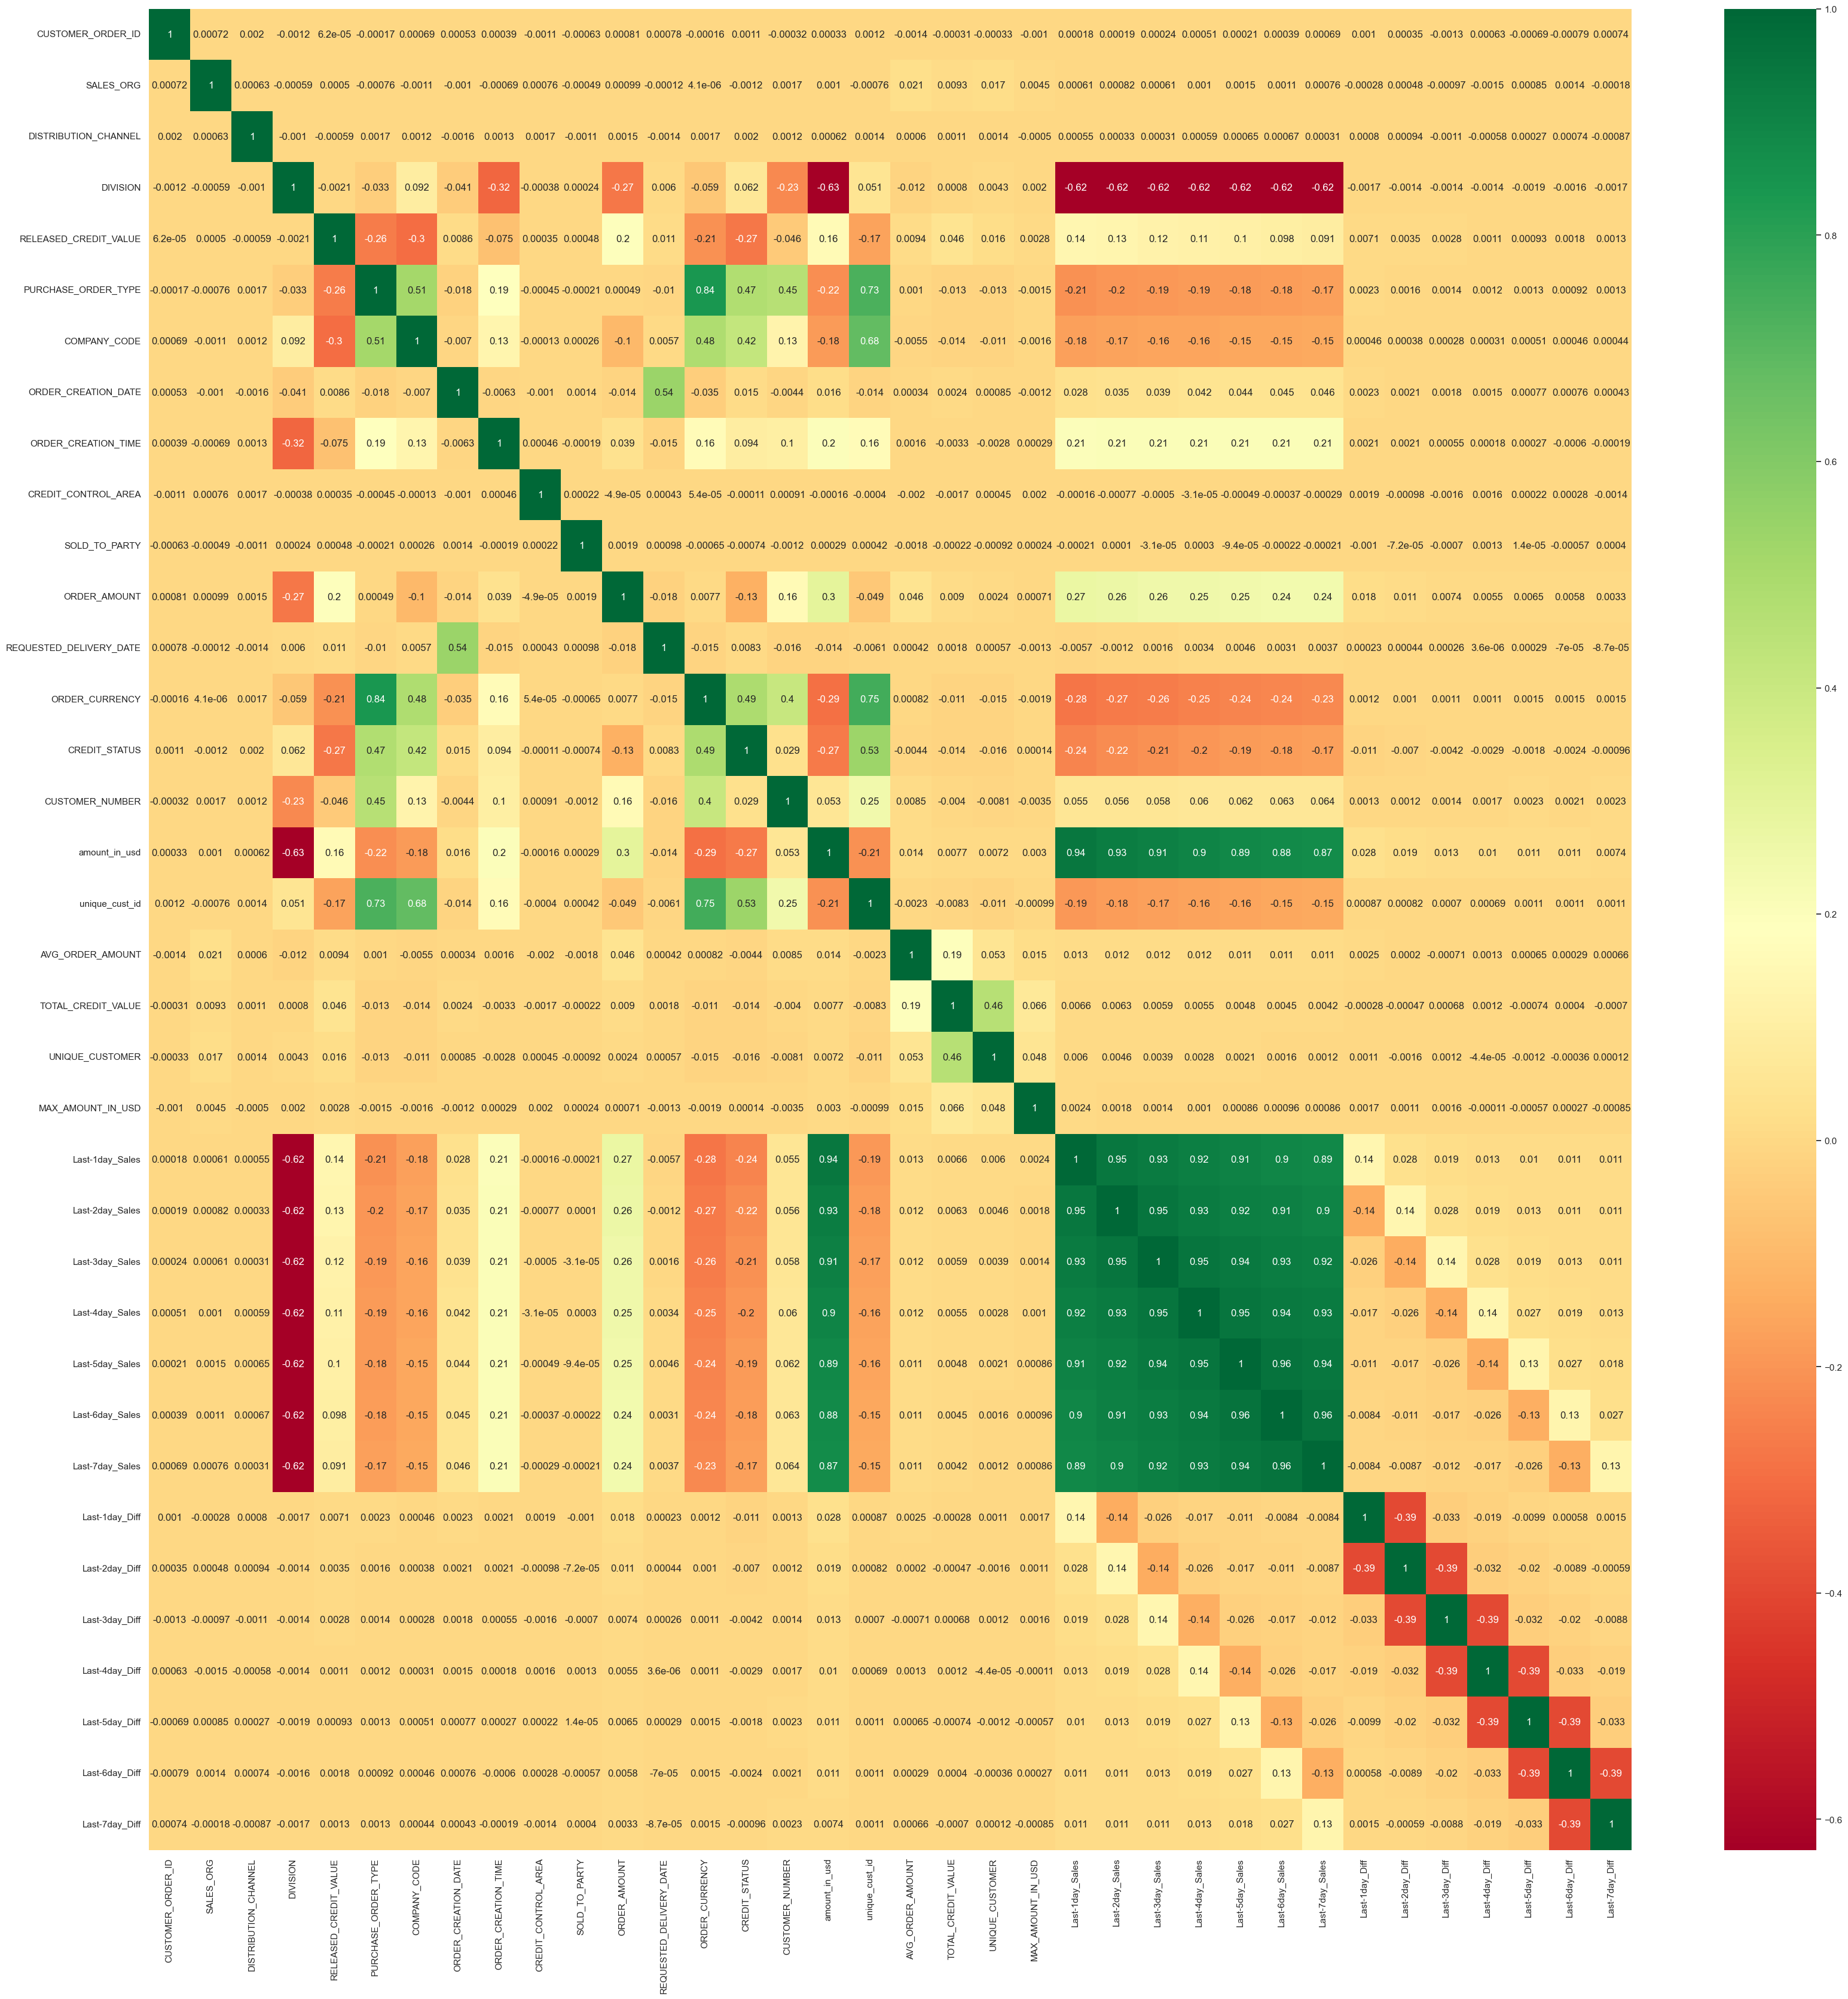

In [40]:
# Heatmap of correlation 
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [41]:
# Identifying important or relevant columns for feature extraction
cmat = df.corr().abs()
imp = np.where(cmat > 0.7)

high_corr_columns = []
for i, j in zip(imp[0], imp[1]):
    if (i != j) and (i<j):  
        column_pair = (df.columns[i], df.columns[j])
        high_corr_columns.append(column_pair)

print(high_corr_columns)

[('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('PURCHASE_ORDER_TYPE', 'unique_cust_id'), ('ORDER_CURRENCY', 'unique_cust_id'), ('amount_in_usd', 'Last-1day_Sales'), ('amount_in_usd', 'Last-2day_Sales'), ('amount_in_usd', 'Last-3day_Sales'), ('amount_in_usd', 'Last-4day_Sales'), ('amount_in_usd', 'Last-5day_Sales'), ('amount_in_usd', 'Last-6day_Sales'), ('amount_in_usd', 'Last-7day_Sales'), ('Last-1day_Sales', 'Last-2day_Sales'), ('Last-1day_Sales', 'Last-3day_Sales'), ('Last-1day_Sales', 'Last-4day_Sales'), ('Last-1day_Sales', 'Last-5day_Sales'), ('Last-1day_Sales', 'Last-6day_Sales'), ('Last-1day_Sales', 'Last-7day_Sales'), ('Last-2day_Sales', 'Last-3day_Sales'), ('Last-2day_Sales', 'Last-4day_Sales'), ('Last-2day_Sales', 'Last-5day_Sales'), ('Last-2day_Sales', 'Last-6day_Sales'), ('Last-2day_Sales', 'Last-7day_Sales'), ('Last-3day_Sales', 'Last-4day_Sales'), ('Last-3day_Sales', 'Last-5day_Sales'), ('Last-3day_Sales', 'Last-6day_Sales'), ('Last-3day_Sales', 'Last-7day_Sales'), ('Last-4d

# 

## ML Models and Evaluations

In [42]:
# Anti-Log Transformations on continuous columns
columns = ['amount_in_usd', 'RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT']
df[columns] = np.exp(df[columns])

In [43]:
# Taking data to be used for training
selected_col = ["RELEASED_CREDIT_VALUE", 'SALES_ORG','TOTAL_CREDIT_VALUE', 'unique_cust_id', "PURCHASE_ORDER_TYPE","Last-6day_Sales", "Last-1day_Sales", "Last-1day_Diff", "Last-6day_Diff"]
features = df[selected_col]
target = df['amount_in_usd']

In [44]:
df.dropna(inplace=True)

In [45]:
encoder = OneHotEncoder()
features = encoder.fit_transform(features)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=420)

In [47]:
# Standardizing the features in the training and test datasets
scaler = StandardScaler(with_mean=False)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
linear_regression = LinearRegression()
# support_vector_machine = SVR()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)
adaboost = AdaBoostRegressor()
xgboost = xgb.XGBRegressor()

In [49]:
linear_regression.fit(x_train, y_train)
linear_regression_predictions = linear_regression.predict(x_test)
#19.2s

In [50]:
# support_vector_machine.fit(x_train, y_train)
# support_vector_machine_predictions = support_vector_machine.predict(x_test)

In [51]:
decision_tree.fit(x_train, y_train)
decision_tree_predictions = decision_tree.predict(x_test)
#2m 48.3s

In [52]:
random_forest.fit(x_train, y_train)
random_forest_predictions = random_forest.predict(x_test)
#50m 42.7s

In [53]:
adaboost.fit(x_train, y_train)
adaboost_predictions = adaboost.predict(x_test)
#27m 4.6s

In [54]:
xgboost.fit(x_train, y_train)
xgboost_predictions = xgboost.predict(x_test)
#28.1s

In [55]:
print("Mean Squared Error and Root Mean Squared Error: ")

mse_lr = mean_squared_error(y_test, linear_regression_predictions)
rmse_lr = np.sqrt(mse_lr)
# mse_svm = mean_squared_error(y_test, support_vector_machine_predictions)
# rmse_svm = np.sqrt(mse_svm)
mse_dt = mean_squared_error(y_test, decision_tree_predictions)
rmse_dt = np.sqrt(mse_dt)
mse_rf = mean_squared_error(y_test, random_forest_predictions)
rmse_rf = np.sqrt(mse_rf)
mse_ada = mean_squared_error(y_test, adaboost_predictions)
rmse_ada = np.sqrt(mse_ada)
mse_xg = mean_squared_error(y_test, xgboost_predictions)
rmse_xg = np.sqrt(mse_xg)
print(f'linear_regression: {mse_lr} and {rmse_lr},\ndecision_tree: {mse_dt} and {rmse_dt},\nrandom_forest: {mse_rf} and {rmse_rf},\nadaboost: {mse_ada} and {rmse_ada},\nxgboost: {mse_xg} and {rmse_xg}')


Mean Squared Error and Root Mean Squared Error: 
linear_regression: 93463.23222045095 and 305.717569368283,
decision_tree: 107000.1866369874 and 327.1088299587576,
random_forest: 4552667.898541878 and 2133.698174190032,
adaboost: 30087293.74543661 and 5485.188578839984,
xgboost: 159778.59438163385 and 399.72314716767886


In [56]:
print("R-squared score: ")

r2_lr = r2_score(y_test, linear_regression_predictions)
#r2_svm = r2_score(y_test, support_vector_machine_predictions)
r2_dt = r2_score(y_test, decision_tree_predictions)
r2_rf = r2_score(y_test, random_forest_predictions)
r2_ada = r2_score(y_test, adaboost_predictions)
r2_xg = r2_score(y_test, xgboost_predictions)
print(f'linear_regression: {r2_lr},\ndecision_tree: {r2_dt},\nrandom_forest: {r2_rf},\nadaboost: {r2_ada},\nxgboost: {r2_xg}')

R-squared score: 
linear_regression: 0.9998307557551346,
decision_tree: 0.9998062428897695,
random_forest: 0.9917559790913906,
adaboost: 0.9455175988566406,
xgboost: 0.999710671170798


In [57]:
# Comparing the accuracies of all the models 

labels = ['Linear Regression','Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
mse_values = [mse_lr, mse_dt, mse_rf, mse_ada, mse_xg]
rmse_values = [rmse_lr, rmse_dt, rmse_rf, rmse_ada, rmse_xg]
r2_values = [r2_lr, r2_dt, r2_rf, r2_ada, r2_xg]

data = {
    'Model': labels,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R-Squared': r2_values,
}
df_val = pd.DataFrame(data)
df_val.set_index('Model', inplace=True)
df_val

,MSE,RMSE,R-Squared
Model,,,
Linear Regression,9.346323e+04,305.717569,0.999831
Decision Tree,1.070002e+05,327.108830,0.999806
Random Forest,4.552668e+06,2133.698174,0.991756
AdaBoost,3.008729e+07,5485.188579,0.945518
XGBoost,1.597786e+05,399.723147,0.999711


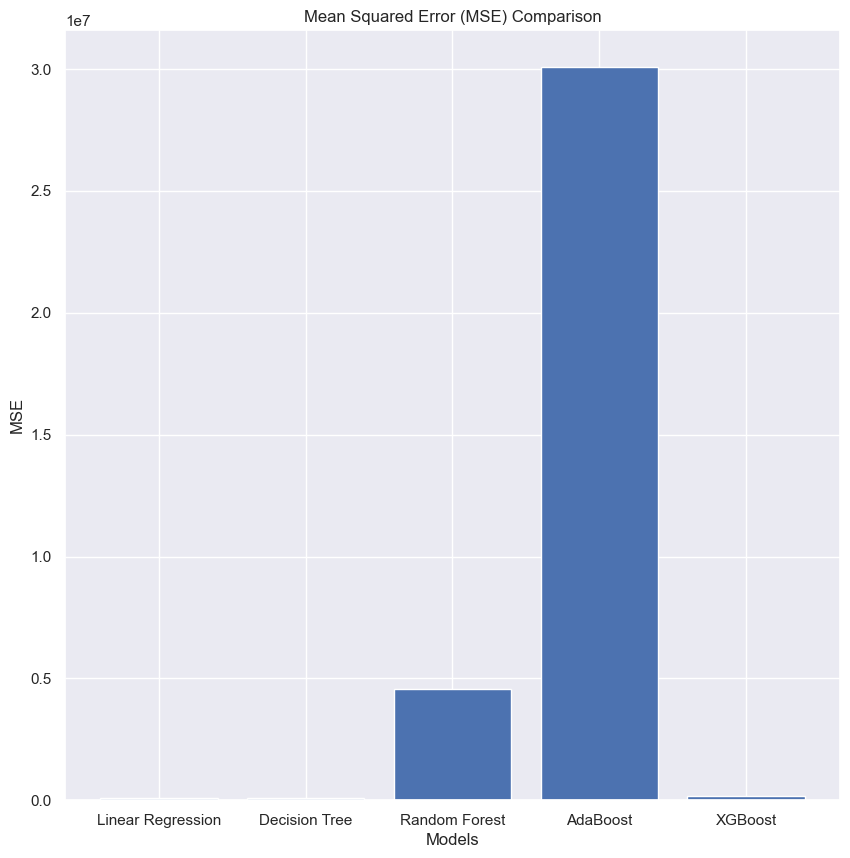

In [58]:
sns.set(style="darkgrid")

figure=plt.figure(figsize=(10,10))
plt.bar(labels, mse_values)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison')
plt.show()

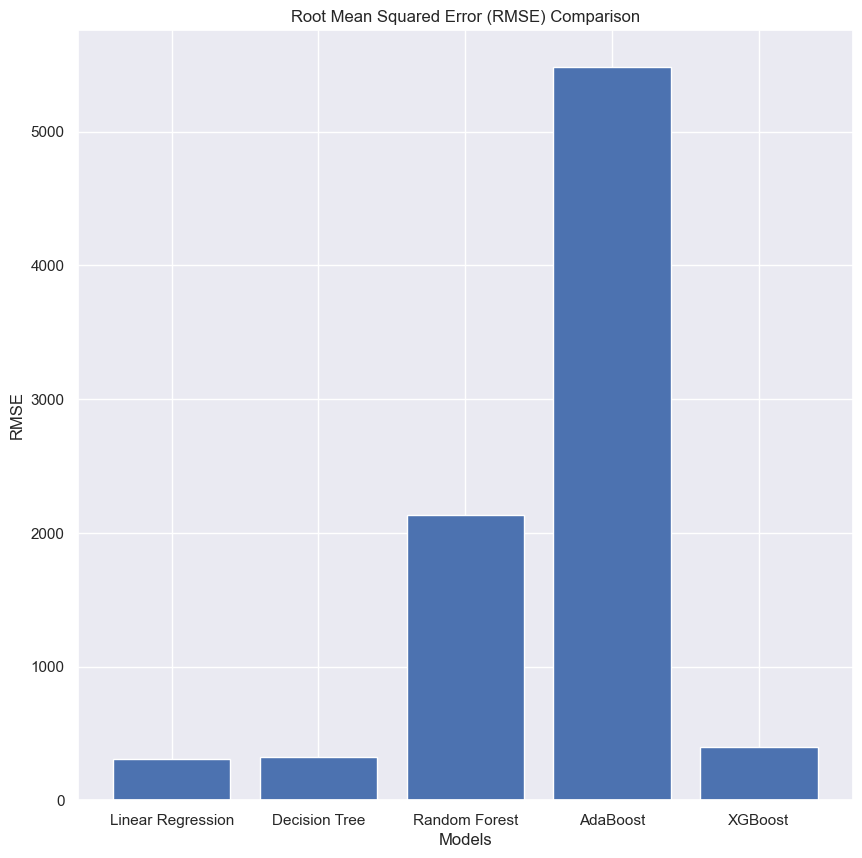

In [59]:
figure=plt.figure(figsize=(10,10))
plt.bar(labels, rmse_values)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.show()

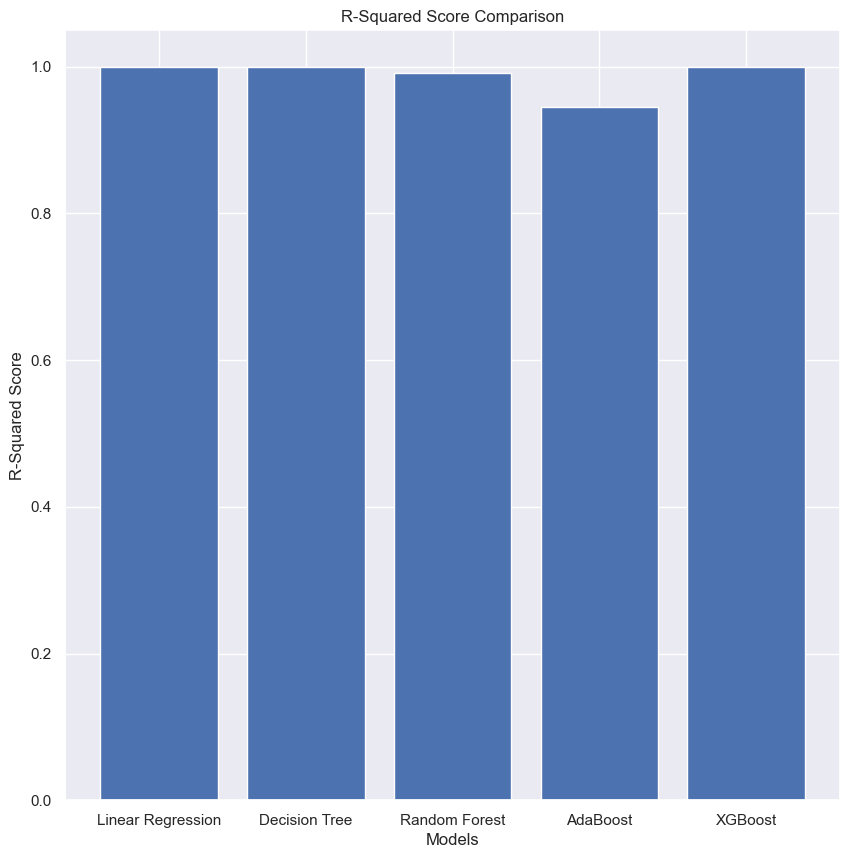

In [60]:
figure=plt.figure(figsize=(10,10))
plt.bar(labels, r2_values)
plt.xlabel('Models')
plt.ylabel('R-Squared Score')
plt.title('R-Squared Score Comparison')
plt.show()

In [61]:
# Selecting the best possible model

models = {
    'Linear Regression': linear_regression,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'AdaBoost': adaboost,
    'XGBoost': xgboost
}

cv_rmse_scores = {}
cv_mse_scores = {}
cv_r2_scores = {}
cv_mae_scores = {}

In [62]:
for model_name, model in models.items():
    cv_rmse = np.sqrt(-cross_val_score(model, features, target, cv=3, scoring='neg_mean_squared_error'))
    cv_rmse_scores[model_name] = cv_rmse.mean()

    cv_mse = -cross_val_score(model, features, target, cv=3, scoring='neg_mean_squared_error')
    cv_mse_scores[model_name] = cv_mse.mean()

    cv_r2 = cross_val_score(model, features, target, cv=3, scoring='r2')
    cv_r2_scores[model_name] = cv_r2.mean()

#

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
best_model_rmse = min(cv_rmse_scores, key=cv_rmse_scores.get)
best_model_mse = min(cv_mse_scores, key=cv_mse_scores.get)
best_model_r2 = max(cv_r2_scores, key=cv_r2_scores.get)

print(f"Cross-Validation Scores:\nRMSE: {cv_rmse_scores}\nMSE: {cv_mse_scores}\nR2: {cv_r2_scores}")

print(f"Best model based on \nRMSE: {best_model_rmse}\n MSE: {best_model_mse}\n R2: {best_model_r2}")

Cross-Validation Scores:
RMSE: {'Linear Regression': 5591.3364186227145, 'Decision Tree': 4638.823604251989, 'Random Forest': 5556.960075997086, 'AdaBoost': 6761.669088515267, 'XGBoost': 4558.59718684622}
MSE: {'Linear Regression': 92203578.91646747, 'Decision Tree': 62037413.87494927, 'Random Forest': 63427740.393736266, 'AdaBoost': 65642147.142030954, 'XGBoost': 58952186.281953685}
R2: {'Linear Regression': 0.9091788043807028, 'Decision Tree': 0.9388327020065731, 'Random Forest': 0.932595611645383, 'AdaBoost': 0.9126404248733776, 'XGBoost': 0.941811301785842}
Best model based on 
RMSE: XGBoost
 MSE: XGBoost
 R2: XGBoost


In [ ]:
# Performing Hyperparameter tuning

# RandomizedSearch
param_dist_xg = {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.0001, 0.1)}
random_search_xg = RandomizedSearchCV(xgboost, param_dist_xg, cv=5, scoring='neg_mean_squared_error', n_iter=10)
random_search_xg.fit(x_train, y_train)
best_params_xg = random_search_xg.best_params_

#

In [ ]:
#GridSearch

def hyperparam(model, x_train, y_train, x_test, y_test):
    grid_search = GridSearchCV(estimator = model, param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(x_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    y_pred = grid_search.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    return grid_search.best_estimator_, mse, rmse, r2

In [ ]:
hyperparam(xgboost, x_train, y_train, x_test, y_test) 
#

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 100}
0.9996059358902375
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
MSE:  159778.59438163385
RMSE:  399.72314716767886
R2:  0.999710671170798


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 159778.59438163385,
 399.72314716767886,
 0.999710671170798)